# Проект: Исследование стартапов

## Введение

Для разработки модели бизнеса финансовой компании, которая предоставляет льготные займы стартапам, нужна информация, сформированная на основании имеющихся исторических данных.  

**С целью** входа на инвестиционный рынок с перспективой покупки, развития и последующей перепродажы перспективных стартапов, проводится исследование на основании некоторого набора датасетов.  

Поскольку данные претерпевали изменения в процессе их предварительного анализа, **необходимо провести работу** по оптимизации, корректировке и анализу, позволяющему сделать необходимые выводы.



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия и описание предоставленных для анализа файлов:
* acquisition.csv - Содержит информацию о покупках одними компаниями других компаний
* company_and_rounds.csv - Содержит информацию о компаниях и раундах финансирования
* people.csv - Содержит информацию о сотрудниках
* education.csv - Содержит информацию об образовании сотрудника
* degrees.csv - Содержит информацию о типе образования сотрудника

Опциональные датасеты:
* fund.csv - Содержит информацию о фондах
* investment.csv - Содержит информацию о раундах инвестирования


### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузка всех данные по проекту.
- Проверка названия столбцов.
- Вывод информации, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)
import matplotlib.pyplot as plt

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Выгружаем данные в переменные 
acquisition_df = pd.read_csv('https://code.s3.yandex.net//datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net//datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net//datasets/degrees.csv')

# Опциональные датасеты:
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net//datasets/investment.csv')

In [4]:
# Выводим первые строки датафрейма о покупках одними компаниями других компаний:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
# Выводим уникальные значения вариантов расчета.
display(acquisition_df['term_code'].nunique())
display(acquisition_df['term_code'].unique())

3

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [6]:
# Выводим уникальные значения покупающей компании.
display(acquisition_df['acquiring_company_id'].nunique())
display(acquisition_df['acquiring_company_id'].unique())

4793

array([    11,     59,     24, ..., 267859, 285493, 223792])

In [7]:
# Выводим уникальные значения покупаемой компании.
display(acquisition_df['acquired_company_id'].nunique())
display(acquisition_df['acquired_company_id'].unique())

9264

array([    10,     72,    132, ..., 220208, 286176,  92846])

In [8]:
# Выводим информацию датафрейма о покупках одними компаниями других компаний:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [9]:
# Применяем метод isna() к датафрейму
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [10]:
# Подсчитываем долю строк с пропусками
acquisition_df_sort = acquisition_df.isna().sum() / acquisition_df.shape[0]
# Отсортируем значения по убыванию
acquisition_df_sort = acquisition_df_sort.sort_values(ascending=False)
display(acquisition_df_sort)

term_code               0.805358
acquired_at             0.003083
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
price_amount            0.000000
dtype: float64

In [11]:
# Выводим первые строки датафрейма о компаниях и раундах финансирования:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Проверим что такое вехи финансирования
display(f'milestones: {company_and_rounds_df["milestones"].sort_values().unique()}')

'milestones: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]'

In [13]:
# Выводим информацию датафрейма о компаниях и раундах финансирования:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [14]:
# Применяем метод isna() к датафрейму ПРОПУСКИ
company_and_rounds_df.isna().sum().sort_values(ascending=False)

closed  at               214325
funded  at               165094
is  last  round          164846
is  first  round         164846
participants             164846
pre  money  valuation    164846
raised  amount           164846
funding  round  type     164846
funding  round  id       164846
company  id              164846
network  username        122240
country  code            109167
founded  at              107818
category  code            73888
domain                    70615
company  ID                 302
milestones                  302
name                        302
funding  rounds             302
investment  rounds          302
status                      302
funding  total              302
dtype: int64

==================================================  
В 7 столбцах одинаковое кол-во пропусков (302 шт.). Данные столбцы не имеют идентификатора и названия компании.  

0.	`company ID` — идентификатор компании.
1.	`name` — название компании.
3.	`status` — статус компании.
9.	`investment rounds` — число инвестиционных раундов.
10.	`funding rounds` — число раундов финансирования.
11.	`funding total` — сумма финансирования.
12.	`milestones` — вехи финансирования.

==================================================  
В 8 столбцах одинаковое кол-во пропусков (164 846 шт.). Данные столбцы не имеют информации так же о названии компании (поле дублируется), о сумме и типе финансирования, и прочих параметрах компании.

13.	`funding round id` — идентификатор этапа финансирования.
14.	`company id` — идентификатор компании.
16.	`funding round type` — тип финансирования.
17.	`raised amount` — сумма финансирования.
18.	`pre money valuation` — предварительная денежная оценка.
19.	`participants` — число участников.
20.	`is first round` — является ли раунд первым.
21.	`is last round` — является раунд последним.


In [15]:
# Подсчитываем долю строк с пропусками
company_and_rounds_df_sort = company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]
# Отсортируем значения по убыванию
company_and_rounds_df_sort = company_and_rounds_df_sort.sort_values(ascending=False)
display(company_and_rounds_df_sort)

closed  at               0.984162
funded  at               0.758098
is  last  round          0.756959
is  first  round         0.756959
participants             0.756959
pre  money  valuation    0.756959
raised  amount           0.756959
funding  round  type     0.756959
funding  round  id       0.756959
company  id              0.756959
network  username        0.561316
country  code            0.501286
founded  at              0.495091
category  code           0.339288
domain                   0.324258
company  ID              0.001387
milestones               0.001387
name                     0.001387
funding  rounds          0.001387
investment  rounds       0.001387
status                   0.001387
funding  total           0.001387
dtype: float64

In [16]:
# Выводим первые строки датафрейма о сотрудниках:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [17]:
# Выводим информацию датафрейма о сотрудниках:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [18]:
# Применяем метод isna() к датафрейму
people_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [19]:
# Подсчитываем долю строк с пропусками
people_df_sort = people_df.isna().sum() / people_df.shape[0]
# Отсортируем значения по убыванию
people_df_sort = people_df_sort.sort_values(ascending=False)
display(people_df_sort)

company_id          0.847315
network_username    0.828560
first_name          0.000022
last_name           0.000004
id                  0.000000
dtype: float64

In [20]:
# Выводим первые строки датафрейма об образовании сотрудника:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [21]:
# Выводим информацию датафрейма об образовании сотрудника:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [22]:
# Применяем метод isna() к датафрейму
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [23]:
# Подсчитываем долю строк с пропусками
education_df_sort = education_df.isna().sum() / education_df.shape[0]
# Отсортируем значения по убыванию
education_df_sort = education_df_sort.sort_values(ascending=False)
display(education_df_sort)

graduated_at    0.470359
instituition    0.000502
id              0.000000
person_id       0.000000
dtype: float64

In [24]:
# Выводим первые строки датафрейма о типе образования сотрудника:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Промежуточное замечание:  
Идентификатор сотрудника отличется от идентификатора в таблицах `education_df` и `people_df` дополнительным символом **"р:"**

In [25]:
# Применяем метод isna() к датафрейму
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [26]:
# Подсчитываем долю строк с пропусками
degrees_df_sort = degrees_df.isna().sum() / degrees_df.shape[0]
# Отсортируем значения по убыванию
degrees_df_sort = degrees_df_sort.sort_values(ascending=False)
display(degrees_df_sort)

subject        0.258298
degree_type    0.102345
id             0.000000
object_id      0.000000
dtype: float64

In [27]:
# Выводим информацию датафрейма о типе образования сотрудника:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [28]:
# Выводим первые строки датафрейма о фондах:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [29]:
# Выводим информацию датафрейма о фондах:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [30]:
# Выводим первые строки датафрейма о раундах инвестирования:
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [31]:
# Выводим информацию датафрейма о раундах инвестирования:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


### Промежуточный вывод

- Названия столбцов `company_and_rounds.csv` требуют корректировки на более корректные snake_case, требуется замена названия дублирующихся столбцов идентификаторов компании;
- Кол-во пропусков для некоторых таблиц критично для анализа и требует детальной проработки. 

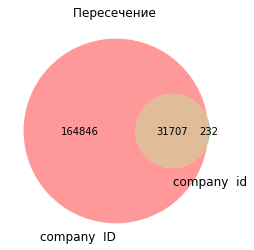

In [32]:
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

### 1.2. Смена типов и анализ пропусков

- Обработка типов данных в столбцах, которые хранят значения даты и времени.
- Оценка полноты данных — достаточно ли данных для решения задач проекта.

In [33]:
# Приводим тип данных в acquisition_df к datetime64[ns]
acquisition_df['acquired_at'] = acquisition_df['acquired_at'].astype('datetime64[ns]')

In [34]:
#Заменяем названия столбцов на более корректные snake_case
comp_and_round_df = company_and_rounds_df.copy()
comp_and_round_df = comp_and_round_df.rename(columns={'company  ID': 'company ID company'}) # Дополняем название во избежание наличия двух столбцов с одинаковым названием
comp_and_round_df.columns = comp_and_round_df.columns.str.replace('  ', ' ').str.lower() # лишние пробелы
comp_and_round_df.columns = comp_and_round_df.columns.str.replace(' ', '_').str.lower() # замена на _

In [35]:
# Меняем тип данных в comp_and_round_df на datetime64 в нескольких столбцах с помощью цикла:
for column in ['founded_at', 'closed_at','funded_at']:
    comp_and_round_df[column] = pd.to_datetime(comp_and_round_df[column])

In [37]:
# Преобразовываем данные в столбцах в формат bool
comp_and_round_df[['is_first_round','is_last_round']] = comp_and_round_df[['is_first_round','is_last_round']].astype('bool')

In [38]:
display('Наименования  столбцов snake_case, типы данных оптимизированы:')
comp_and_round_df.info()

'Наименования  столбцов snake_case, типы данных оптимизированы:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_company   217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [39]:
# Проверяем полные дубликаты в датафрейме
people_df.duplicated().sum()

0

In [40]:
# Приводим тип данных в acquisition_df к datetime64[ns]
education_df['graduated_at'] = education_df['graduated_at'].astype('datetime64[ns]')

In [41]:
# Приводим тип данных в fund_df к datetime64[ns]
# fund_df['founded_at'] = fund_df['founded_at'].astype('datetime64[ns]')

In [42]:
# Проверяем полные дубликаты в датафрейме
education_df.duplicated().sum()

0

### Промежуточный вывод

- Названия столбцов `company_and_rounds.csv` cкорректированы на общепринятые snake_case
- Типы данных в `acquisition_df`, `comp_and_round_df`, `education_df`, `fund_df` преобразованы в типы datetime64 и bool
- Наличие высокого процента пропусков в данных говорит о необходимости дополнительного анализа основной таблицы, необходимой для ответов на запросы заказчика. Повторение одинакового количества пропусков в `company_and_rounds.csv` подтверждает гипотезу заказчика о том, что данные по компаниям из этой таблицы раньше хранились иначе. Необходима корректировка таблицы для приведения в более удобный для исследования формат хранения данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Проводим анализ без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составляем сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставляем в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы строим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных отвечаем на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [43]:
# Выделяем год финансирования из столбца с датой инвестирования
comp_and_round_df_n = comp_and_round_df
comp_and_round_df_n['funded_at_year'] = comp_and_round_df_n['funded_at'].dt.year

# Преобразовываем в целочисленный тип
comp_and_round_df_n['funded_at_year'] = comp_and_round_df_n['funded_at_year'].astype('Int64')
# с заполнением пропусков
comp_and_round_df_n['funded_at_year'].fillna(0, inplace=True)

#исключаем нулевые года
#comp_and_round_df_year = comp_and_round_df_n[comp_and_round_df_n['funded_at_year'] != 0]

# Проверяем тип столбца 
print(comp_and_round_df_n['funded_at_year'].dtype)

Int64


In [44]:
# Создаем сводную таблицу
pivot_year = pd.pivot_table(data=comp_and_round_df_n, 
                           index=['funded_at_year'], # год
                           values=['raised_amount','funding_rounds'], # сумма финансирования, кол-во раундов
                           aggfunc={'raised_amount': ['median','count']}).reset_index()

# Переименовываем столбцы
pivot_year.columns = ['Год', 'Количество раундов','Типичное финансирование (медиана), $']

# Фильтруем по количеству раундов > 50
pivot_year_filt = pivot_year.loc[(pivot_year['Количество раундов'] > 50)&(pivot_year['Год'] > 0)]

# Округляем значения
pivot_year_filt['Типичное финансирование (медиана), $'] = round(pivot_year_filt['Типичное финансирование (медиана), $'], 0)

# Сортируем по году
pivot_year_filt.sort_values(by='Типичное финансирование (медиана), $', inplace=False)
display(pivot_year_filt)

/tmp/ipykernel_168/1574604092.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_year_filt['Типичное финансирование (медиана), $'] = round(pivot_year_filt['Типичное финансирование (медиана), $'], 0)


,Год,Количество раундов,"Типичное финансирование (медиана), $"
16,1999,76,2000000.0
17,2000,125,4200000.0
18,2001,96,3000000.0
19,2002,116,4200000.0
20,2003,159,3000000.0
21,2004,291,5000000.0
22,2005,1633,5500000.0
23,2006,2436,5000000.0
24,2007,3279,3973320.0
25,2008,3774,3110000.0


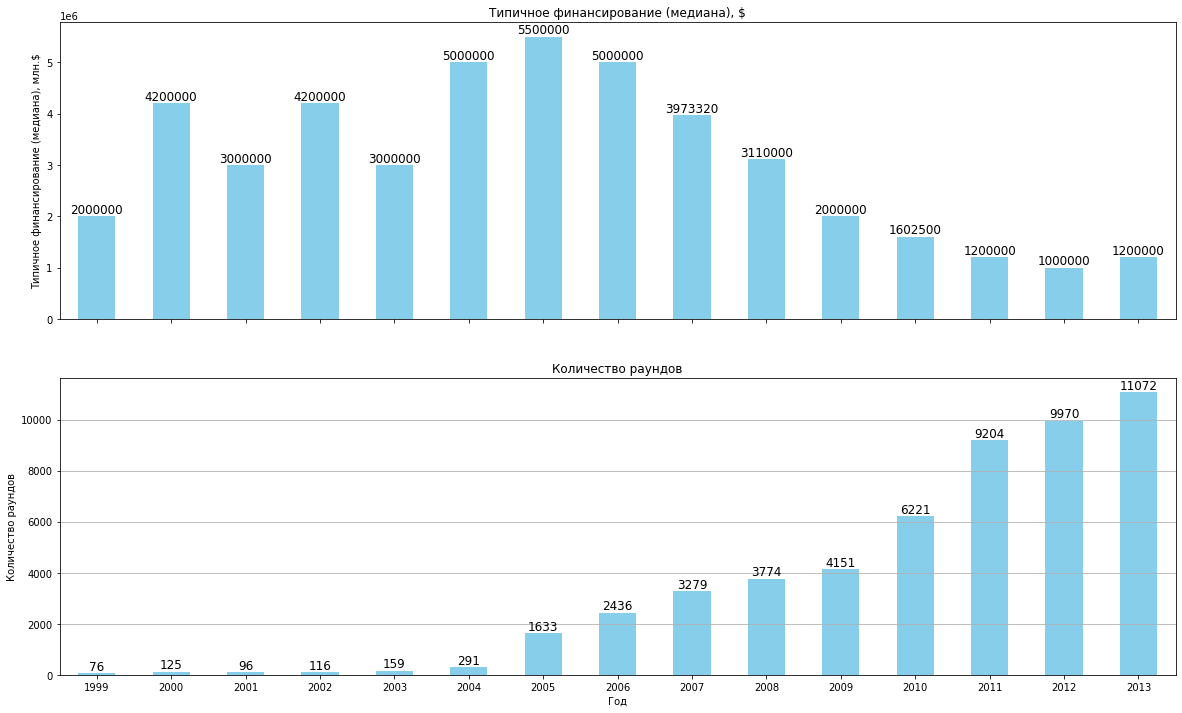

In [45]:
# Формируем диаграмму
pivot_year_filt_bar = pivot_year_filt.plot.bar (x='Год', y=['Типичное финансирование (медиана), $', 'Количество раундов'],
                                              subplots=True, legend=False, sharex=True, sharey=False, rot=0, 
                                              color='skyblue', figsize=(20,12))

plt.rc('font', size=12)
plt.xlabel('Год')

# Добавляем подписи к осям Y 
pivot_year_filt_bar[0].set_ylabel('Типичное финансирование (медиана), млн.$')
pivot_year_filt_bar[1].set_ylabel('Количество раундов')

plt.grid(axis='y')

# Устанавливаем подписи значений у столбцов
for ax in pivot_year_filt_bar:
    for p in ax.patches:  # Обращаемся к патчам конкретной оси
        ax.annotate(f'{p.get_height():.0f}',  # Округляем до 1 знака после запятой
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
plt.show()

**Промежуточный вывод**:   

Начиная с 2005 года наблюдается спад объемов финансирования раундов вплоть до 2012 года с 5,5 млн до  1 млн $.  

2013 год показывает некоторый рост (+200 тыс $).

В 2005 году типичный размер собранных в рамках **одного раунда** средств был максимален и равнялся 5 500 000$. 

В 2013 году наблюдается продолжение тенденции **роста количества раундов** (2010 - 6,2 тыс, 2011 - 9,2 тыс, 2012 - 9,9 тыс раундов) при относительно стабильном за 3 года финансировании (2011 - 1,2 млн, 2012 - 1 млн, 2013 - 1,2 млн $).


### 2.2. Люди и их образование

Для понимания, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний:

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.
- Оценим, возможно ли присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [46]:
people_df.info()
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [47]:
# Соединяем датафреймы по столбцам с разными названиями
# Присоединение делаем левое, т.к. нам нужна информация о всех сотрудниках с привязкой к компании.
df_people_education = people_df.merge(education_df, left_on='id', right_on='person_id', how = 'left')

# Прописываем корректные наименования столбцов
df_people_education = df_people_education.rename(columns={'id_x': 'person_people_id'})
df_people_education = df_people_education.rename(columns={'id_y': 'education_id'})
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person_people_id  267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   education_id      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [48]:
# Т.к. анализ ведем в разрезе компаний, из сводного датафрейма удалим строки, где компания не указана.
df_people_education = df_people_education.dropna(subset=['company_id'])
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44789 entries, 0 to 267691
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person_people_id  44789 non-null  int64         
 1   first_name        44788 non-null  object        
 2   last_name         44788 non-null  object        
 3   company_id        44789 non-null  float64       
 4   network_username  22892 non-null  object        
 5   education_id      28638 non-null  float64       
 6   person_id         28638 non-null  float64       
 7   instituition      28609 non-null  object        
 8   graduated_at      20954 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.4+ MB


In [49]:
# Удаляем сотрудников, у которых есть несколько записей об образовании, но они работают только в одной компании

# Проверяем наличие дубликатов
duplicates = df_people_education.duplicated(subset=['person_people_id', 'company_id'])
print(f"Количество дубликатов: {duplicates.sum()}")

# Удаляем дубликаты, оставляя первое вхождение
df = df_people_education.drop_duplicates(subset=['person_people_id', 'company_id'], keep='first')
df.info()

# Проверяем наличие дубликатов
duplicates1 = df.duplicated(subset=['person_people_id', 'company_id'])
print(f"Количество дубликатов: {duplicates1.sum()}")

df_people_education = df

Количество дубликатов: 10174
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34615 entries, 0 to 267691
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person_people_id  34615 non-null  int64         
 1   first_name        34614 non-null  object        
 2   last_name         34614 non-null  object        
 3   company_id        34615 non-null  float64       
 4   network_username  17313 non-null  object        
 5   education_id      18464 non-null  float64       
 6   person_id         18464 non-null  float64       
 7   instituition      18442 non-null  object        
 8   graduated_at      13720 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 2.6+ MB
Количество дубликатов: 0


In [50]:
# Создаем новый столбец 'has_education' методом notna():
# - 1 означает наличие записи об образовании
# - 0 означает отсутствие записи об образовании

df_people_education['has_education'] = df_people_education['education_id'].notna().astype(int)

In [51]:
df_people_education.tail()

,person_people_id,first_name,last_name,company_id,network_username,education_id,person_id,instituition,graduated_at,has_education
267678,99990,Tzvi,Milshtein,81971.0,NaN,14547.0,99990.0,Technion,1971-01-01,1
267680,99992,Romain,Brabant,146815.0,NaN,NaN,NaN,NaN,NaT,0
267685,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01,1
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,1
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,1


In [52]:
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34615 entries, 0 to 267691
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person_people_id  34615 non-null  int64         
 1   first_name        34614 non-null  object        
 2   last_name         34614 non-null  object        
 3   company_id        34615 non-null  float64       
 4   network_username  17313 non-null  object        
 5   education_id      18464 non-null  float64       
 6   person_id         18464 non-null  float64       
 7   instituition      18442 non-null  object        
 8   graduated_at      13720 non-null  datetime64[ns]
 9   has_education     34615 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 2.9+ MB


In [53]:
# Создаем сводную таблицу
pivot_education = df_people_education.pivot_table(
                    index = "company_id",
                    values = "person_people_id",
                    columns = "has_education",
                    aggfunc = "count",
                    fill_value=0
                    )

# Добавляем общее количество сотрудников
pivot_education['Общее количество сотрудников'] = pivot_education.sum(axis=1)

# Переименовываем столбцы
pivot_education.columns = ['Не имеют образование','Имеют образование','Общее количество сотрудников']

# Сортируем по общему количеству сотрудников (по убыванию)
pivot_education.sort_values(
    by='Общее количество сотрудников',
    ascending=False,
    inplace=True
)
display(pivot_education.head())

# Анализируем данные столбца
display(pivot_education['Общее количество сотрудников'].describe())

,Не имеют образование,Имеют образование,Общее количество сотрудников
company_id,,,
59.0,76,168,244
29.0,40,110,150
1242.0,37,101,138
231067.0,14,58,72
499.0,20,43,63


count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: Общее количество сотрудников, dtype: float64

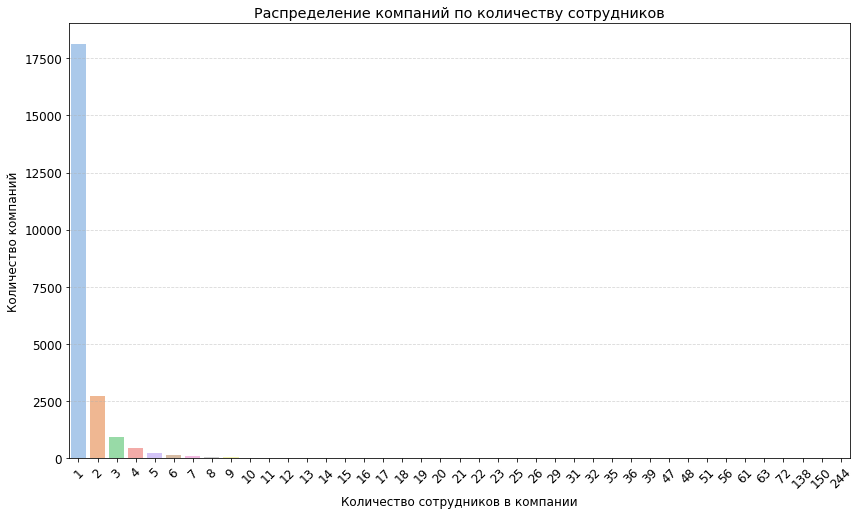

In [54]:
# Подсчитываем количество сотрудников в каждой компании
company_counts = df_people_education.groupby('company_id').size().reset_index(name='count')

# Подсчитываем количество компаний с одинаковым количеством сотрудников
company_distribution = company_counts.groupby('count').size().reset_index(name='company_count')

# Строим график для визуального восприятия
plt.figure(figsize=(14, 8))
sns.barplot(
    data=company_distribution,
    x='count',
    y='company_count',
    palette='pastel'
)

plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников в компании')
plt.ylabel('Количество компаний')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

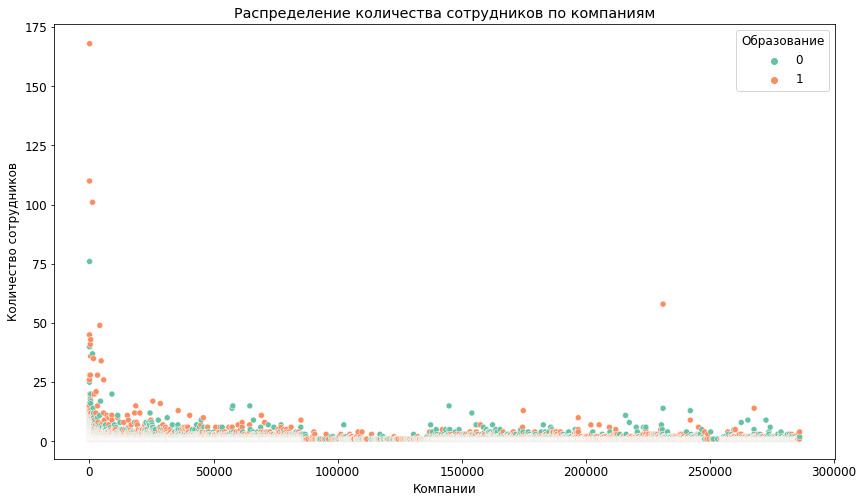

In [55]:
# Агрегируем данные
aggregated = df_people_education.groupby(['company_id', 'has_education']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=aggregated,
    x='company_id',
    y='count',
    hue='has_education',
    palette='Set2'
)
plt.title('Распределение количества сотрудников по компаниям')
plt.xlabel('Компании')
plt.ylabel('Количество сотрудников')
plt.legend(title='Образование', loc='upper right')
plt.show()

In [56]:
# Добавляем процент сотрудников без образования
pivot_education["Процент без образования"] = (
    pivot_education["Не имеют образование"] / pivot_education["Общее количество сотрудников"] * 100
)

# Создаем группы по размеру компании
bins   = [0, 1, 2,  3,     5,     10,     25,   float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

# Разбиваем компании на группы
pivot_education["Численность_компании"] = pd.cut(
    pivot_education["Общее количество сотрудников"],
    bins=bins,
    labels=labels,
    right=True  #правый край интервала включается
)

display(pivot_education.head(10))

# Создаем сводную статистику по группам
grouped_stats = pivot_education.groupby("Численность_компании").agg({
    "Процент без образования": "mean",
    "Общее количество сотрудников": "sum",
    "Имеют образование":"count"
})

grouped_stats.columns = ['Средний_процент_без_образования', 'Общая_сумма_сотрудников', 'Количество_компаний']

display(grouped_stats)

,Не имеют образование,Имеют образование,Общее количество сотрудников,Процент без образования,Численность_компании
company_id,,,,,
59.0,76,168,244,31.147541,26+
29.0,40,110,150,26.666667,26+
1242.0,37,101,138,26.811594,26+
231067.0,14,58,72,19.444444,26+
499.0,20,43,63,31.746032,26+
5.0,16,45,61,26.229508,26+
494.0,20,36,56,35.714286,26+
4175.0,7,49,56,12.500000,26+
12.0,25,26,51,49.019608,26+


,Средний_процент_без_образования,Общая_сумма_сотрудников,Количество_компаний
Численность_компании,,,
1,46.260418,18117,18117
2,46.603913,5418,2709
3,48.678972,2763,921
4-5,49.730713,2985,687
6-10,53.182798,2664,368
11-25,45.875973,1425,101
26+,26.546599,1243,19


In [57]:
# Проверка наличия информации о типе образования сотрудника
degrees_df.info()
display(degrees_df.head())

# Удаление доп.символов
degrees_df['object_id'] = degrees_df['object_id'].apply(lambda x: x[2:])
degrees_df['object_id'] = degrees_df['object_id'].astype(int)

# Присоединение делаем левое, т.к. нужна информация о типе образования/специальности всех сотрудников, имеющих запись об образовании
df_education_degrees = education_df.merge(degrees_df, left_on='person_id', right_on='object_id', how = 'left')

# Прописываем корректные наименования столбцов
df_education_degrees = df_education_degrees.rename(columns={'id_x': 'education_id'})
df_education_degrees = df_education_degrees.rename(columns={'id_y': 'degrees_id'})

display(df_education_degrees.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


,education_id,person_id,instituition,graduated_at,degrees_id,object_id,degree_type,subject
0,1,6117,NaN,NaT,1,6117,MBA,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01,2,6136,BA,"English, French"
2,2,6136,"Washington University, St. Louis",1990-01-01,3,6136,MS,Mass Communication
3,3,6136,Boston University,1992-01-01,2,6136,BA,"English, French"
4,3,6136,Boston University,1992-01-01,3,6136,MS,Mass Communication


**Промежуточный вывод:**  

Информация об образовании сотрудников `people.csv` имеет больше половины пропусков в идентификаторе компании. При 226 тыс. строк пропуски имеются в 192 тыс.строк. Т.к. в данном запросе анализ ведем в разрезе компаний, из сводного датасета их удаляем.  
Но вызывает вопрос целесообразности ведения базы сотрудников без привязки к финансируемой компании (из 226 709 сотрудников запись о наличие компании имеется только у 34 615).

Данные об образовании сотрудника `education.csv` заполненны более корректно: всего 55 пропусков названий учебного заведения на 109 610 записей о наличие образования у сотрудника. Даты получения образования пропущены на 50%, но удалению не подлежат, т.к. поле не требуется в текущем анализе.

- Анализ столбца `Общее количество сотрудников` показал, что основная масса компаний имеет не более 10 сотрудников. Особенно выделяется объем компаний с всего **одним сотрудником**. Для даного количества создана первая группа на 18 117 компаний. 
- Кратно меньше компаний имеют по 2 сотрудника в штате (2 709 шт.).
- До 10 человек в штате суммарно имеют 1 976 компаний. В таблице ниже распределение данных указано. 

| Численность_компании | Средний_процент_без_образования | Общая_сумма_сотрудников | Количество_компаний |
|---------------------|--------------------------------|------------------------|---------------------|
| 1 | 46.260418 | 18117 | 18117 |
| 2 | 46.603913 | 5418 | 2709 |
| 3 | 48.678972 | 2763 | 921 |
| 4-5 | 49.730713 | 2985 | 687 |
| 6-10 | 53.182798 | 2664 | 368 |
| 11-25 | 45.875973 | 1425 | 101 |
| 26+ | 26.546599 | 1243 | 19 |


- Данный анализ показывает, что полнота сведений об образовании сотрудников не сильно зависит от размера компании и по всем группам кол-во сотрудников **без образования** варьируется в пределах 46-49,7 %.  

    Выделяюся 2 группы: 
    - компании с кол-ом сотрудников 26+ имеют в среднем всего 26,5% человек **без образования**;  
    - компании с кол-ом от 6 до 10 чел. наоборот имеют максимальный средний процент сотрудников **без образованием** - 53,2%
- Присоединение таблицы `degrees.csv` к `education.csv` или `people.csv` возможно при проведении редактирования столбца object_id (идентификатор сотрудника), имеющего дополнительные символы "р:". Однако, для ответа на вопрос "Имеется ли у сотрудника компании образование?" детализация по типу или специальности не требуется. 

### 2.3. Объединять или не объединять — вот в чём вопрос

In [58]:
empty_count_round = comp_and_round_df_n['network_username'].isna().sum()
print(f"При кол-ве строк в comp_and_round {comp_and_round_df_n.shape[0]} пропусков network_username: {empty_count_round}")
empty_count_people = people_df['network_username'].isna().sum()
print(f"При кол-ве строк в people {people_df.shape[0]} пропусков network_username: {empty_count_people}")
empty_count_fund = fund_df['network_username'].isna().sum()
print(f"При кол-ве строк в fund {fund_df.shape[0]} пропусков network_username: {empty_count_fund}")

При кол-ве строк в comp_and_round 217774 пропусков network_username: 122240
При кол-ве строк в people 226709 пропусков network_username: 187842
При кол-ве строк в fund 11652 пропусков network_username: 9503


In [59]:
# Склеим столбцы
result = pd.concat([
    comp_and_round_df_n['network_username'].rename('network_username_round'),
    people_df['network_username'].rename('network_username_people'),
    fund_df['network_username'].rename('network_username_fund')
], axis=1)
display(result.head())

,network_username_round,network_username_people,network_username_fund
0,BachelrWetpaint,NaN,NaN
1,BachelrWetpaint,NaN,greylockvc
2,BachelrWetpaint,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [60]:
# Проверяем количество уникальных значений
unique_values = {
    'round': comp_and_round_df_n['network_username'].nunique(),
    'people': people_df['network_username'].nunique(),
    'fund': fund_df['network_username'].nunique()
}

print("Количество уникальных значений:")
print(unique_values)

# Проверяем наличие общих уникальных значений
common_values = set(comp_and_round_df_n['network_username']).intersection(
    set(people_df['network_username']),
    set(fund_df['network_username'])
)

print(f"Количество общих значений во всех датасетах: {len(common_values)}")

Количество уникальных значений:
{'round': 79571, 'people': 38421, 'fund': 2098}
Количество общих значений во всех датасетах: 8


**Промежуточный вывод**:  

Столбец `network_username`,который встречается в нескольких датасетах, НЕ подходит для объединения данных, т.к. несет в себе разную информацию. При этом общих значений во всех трех датасетах только 8.

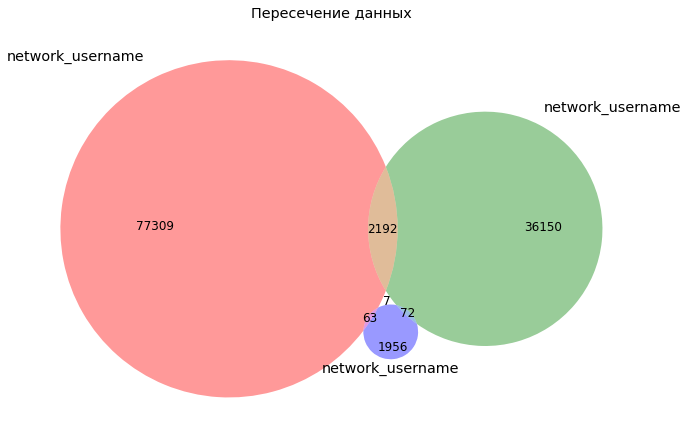

In [61]:
round_username = set(comp_and_round_df_n['network_username'].dropna().unique())
people = set(people_df['network_username'].dropna().unique())
fund = set(fund_df['network_username'].dropna().unique())

# Строим диаграмму Венна
venn3([round_username, people, fund], set_labels=('network_username', 'network_username', 'network_username'))

# Отображаем график
plt.title("Пересечение данных")
plt.gcf().set_size_inches(10, 108)  # Устанавливаем размер графика
plt.tight_layout()
plt.show()


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Необходимо привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, данные скорректированы так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [62]:
# Используем для анализа датасет с преобразованными названиями столбцов
display(comp_and_round_df_n.isna().sum())

company_id_company        302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round              0
is_last_round               0
funded_at_year              0
dtype: int64

In [63]:
# Т.к. видим, что в таблице пропуски собраны группами и после funding_round_id их основная часть, предполагаем, 
# что таблицы company и rounds "склеили" по company_id.
# Разделим на 2 части.

# Создаем первую таблицу - КОМПАНИИ
companies_df = comp_and_round_df.iloc[:, 0:13]
companies_df = companies_df.reset_index(drop=True)

# Создаем вторую таблицу - РАУНДЫ ФИНАНСИРОВАНИЯ
rounds_df = comp_and_round_df.iloc[:, 13:23]
rounds_df = rounds_df.reset_index(drop=True)

# Выводим результат
display("Таблица КОМПАНИИ (companies_df):")
display(companies_df.head())
companies_df.info()

display("Таблица РАУНДЫ ФИНАНСИРОВАНИЯ (rounds_df):")
display(rounds_df.head())
rounds_df.info()

'Таблица КОМПАНИИ (companies_df):'

,company_id_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company_id_company  217472 non-null  float64       
 1   name                217472 non-null  object        
 2   category_code       143886 non-null  object        
 3   status              217472 non-null  object        
 4   founded_at          109956 non-null  datetime64[ns]
 5   closed_at           3449 non-null    datetime64[ns]
 6   domain              147159 non-null  object        
 7   network_username    95534 non-null   object        
 8   country_code        108607 non-null  object        
 9   investment_rounds   217472 non-null  float64       
 10  funding_rounds      217472 non-null  float64       
 11  funding_total       217472 non-null  float64       
 12  milestones          217472 non-null  float64       
dtypes: datetime64[ns](2), float64

'Таблица РАУНДЫ ФИНАНСИРОВАНИЯ (rounds_df):'

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,False,True,2005
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,False,False,2007
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,True,False,2008
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True,True,0
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True,True,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   funding_round_id     52928 non-null   float64       
 1   company_id           52928 non-null   float64       
 2   funded_at            52680 non-null   datetime64[ns]
 3   funding_round_type   52928 non-null   object        
 4   raised_amount        52928 non-null   float64       
 5   pre_money_valuation  52928 non-null   float64       
 6   participants         52928 non-null   float64       
 7   is_first_round       217774 non-null  bool          
 8   is_last_round        217774 non-null  bool          
 9   funded_at_year       217774 non-null  Int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(5), object(1)
memory usage: 13.9+ MB


In [64]:
# Удаляем полные дубликаты в датафрейме companies_df
companies_df_cleaned = companies_df.drop_duplicates(subset=None, keep='first', inplace=False)

# Удаляем строки, где в столбце company_id_company есть NaN
companies_df_cleaned = companies_df_cleaned[~companies_df['company_id_company'].isnull()]
companies_df_cleaned = companies_df_cleaned.reset_index(drop=True)

# Выводим результат
display("Таблица КОМПАНИИ (companies_df):")
#display(companies_df_cleaned.tail(20))
companies_df_cleaned.info()

/tmp/ipykernel_168/2831792162.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  companies_df_cleaned = companies_df_cleaned[~companies_df['company_id_company'].isnull()]


'Таблица КОМПАНИИ (companies_df):'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company_id_company  196553 non-null  float64       
 1   name                196553 non-null  object        
 2   category_code       123186 non-null  object        
 3   status              196553 non-null  object        
 4   founded_at          91227 non-null   datetime64[ns]
 5   closed_at           2620 non-null    datetime64[ns]
 6   domain              126545 non-null  object        
 7   network_username    80591 non-null   object        
 8   country_code        87990 non-null   object        
 9   investment_rounds   196553 non-null  float64       
 10  funding_rounds      196553 non-null  float64       
 11  funding_total       196553 non-null  float64       
 12  milestones          196553 non-null  float64       
dtypes: datetime64[ns](2), float64

In [65]:
# Удаляем полные дубликаты в датафрейме rounds_df
rounds_df_cleaned = rounds_df.drop_duplicates(subset=None, keep='first', inplace=False)

# Удаляем строки, где в столбце company_id_company есть NaN
rounds_df_cleaned = rounds_df_cleaned[~rounds_df['company_id'].isnull()]
rounds_df_cleaned = rounds_df_cleaned.reset_index(drop=True)

# Выводим результат
display("Таблица РАУНДЫ ФИНАНСИРОВАНИЯ (rounds_df):")
rounds_df_cleaned.info()

/tmp/ipykernel_168/359141478.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rounds_df_cleaned = rounds_df_cleaned[~rounds_df['company_id'].isnull()]


'Таблица РАУНДЫ ФИНАНСИРОВАНИЯ (rounds_df):'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  bool          
 8   is_last_round        52928 non-null  bool          
 9   funded_at_year       52928 non-null  Int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(5), object(1)
memory usage: 3.4+ MB


**Промежуточный вывод**:  

В связи с тем, что в `company_and_rounds.csv` очень много пропусков как раз в раундах, информация о которых заказчику важна, данные разделены на 2 таблицы, имеющих вид, который позволяет в дальнейшем проводить анализ в разрезе отдельных компаний.  

Данные сохранены максимальным образом (удалены только полные дубликаты и полностью пустые строки), сохранена их связность по столбцам `company_id / company_id_company`. Данные сохранены так, что удобно отобрать компании по параметрам и рассчитывать показатели из расчёта на одну компанию без промежуточных агрегаций.



## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Объедим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` —  только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [66]:
# Фильтрация данных 
df_40000 = companies_df_cleaned[(companies_df_cleaned['funding_rounds'] > 0) | 
                 (companies_df_cleaned['investment_rounds'] > 0) | 
                 (companies_df_cleaned['status'] == 'acquired')]
display(df_40000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_id_company  40747 non-null  float64       
 1   name                40747 non-null  object        
 2   category_code       35315 non-null  object        
 3   status              40747 non-null  object        
 4   founded_at          27807 non-null  datetime64[ns]
 5   closed_at           2128 non-null   datetime64[ns]
 6   domain              35754 non-null  object        
 7   network_username    20850 non-null  object        
 8   country_code        34742 non-null  object        
 9   investment_rounds   40747 non-null  float64       
 10  funding_rounds      40747 non-null  float64       
 11  funding_total       40747 non-null  float64       
 12  milestones          40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
m

None

In [67]:
df_40000.head()

,company_id_company,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обращаем внимание на показатели, возвращаемые методом `.describe()`.

In [68]:
# Рассмотрим краткое статистическое описание данных столбца funding_total
df_40000['funding_total'].describe().apply(lambda x: '{:.0f}'.format(x))

count         40747
mean       10135610
std        56464360
min               0
25%               0
50%          600000
75%         5650650
max      5700000000
Name: funding_total, dtype: object

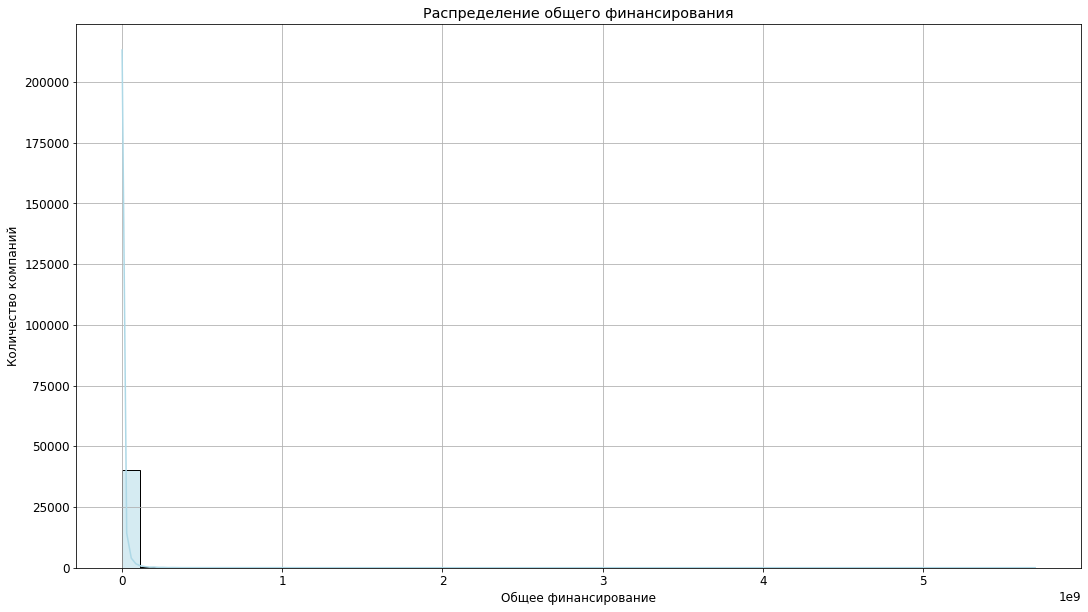

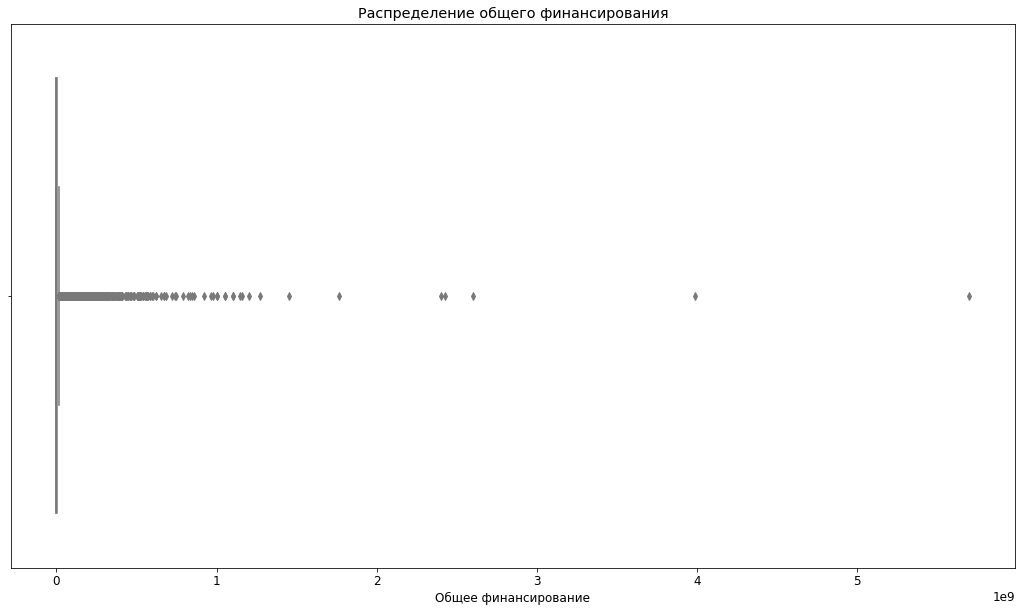

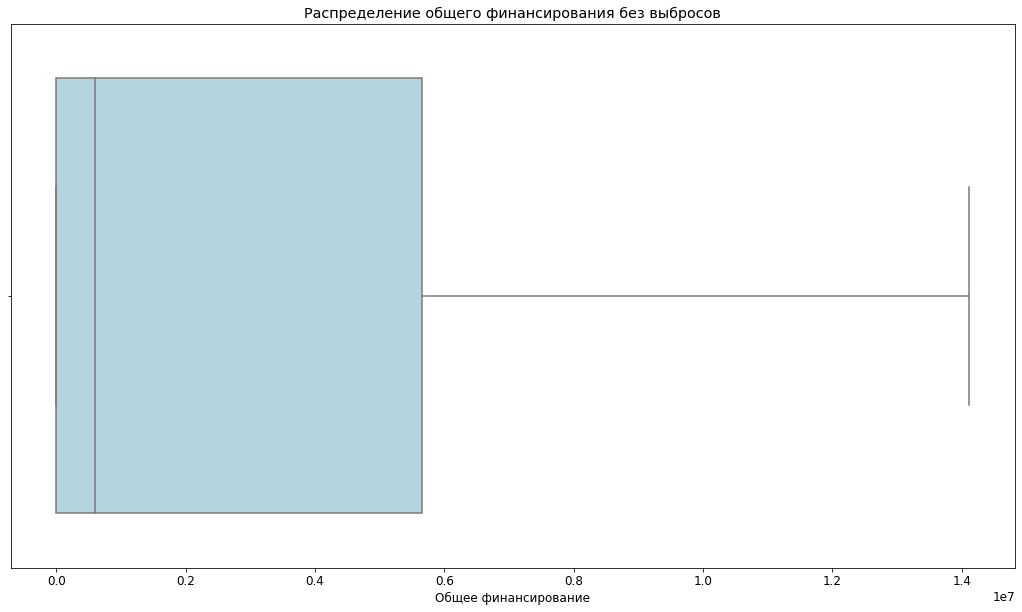

In [69]:
# Гистограмма
plt.figure(figsize=(18, 10))
sns.histplot(df_40000['funding_total'], bins=50, kde=True, color='#ADD8E6')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование')
plt.ylabel('Количество компаний')
plt.grid(True)
plt.show()

# Ящик с усами
plt.figure(figsize=(18, 10))
sns.boxplot(x=df_40000['funding_total'], color='#ADD8E6')
plt.title('Ящик с усами для финансирования')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование')
plt.show()

# Ящик с усами с отключенным отображением выбросов
plt.figure(figsize=(18, 10))
sns.boxplot(x=df_40000['funding_total'], showfliers=False, color='#ADD8E6')
plt.title('Ящик с усами для финансирования с отключенным отображением выбросов ')
plt.title('Распределение общего финансирования без выбросов')
plt.xlabel('Общее финансирование')
plt.show()

**Промежуточный вывод**:  

В данных наблюдается асимметрия, среднее (10.1 млн) значительно меньше медианы (600 000), при этом  максимальное значение очень высокое. Значительная часть данных имеет нулевое финансирование (25% значений равны 0). Т.к. максимальное значение равно 5.7 млрд $, необходимо проверить на наличие выбросов в данных.

Графики, сформированные на основании текущих данных столбца (без фильтрации) не информативны.  

К данным столбца `funding_total` обычные способы нахождения типичных значений не применимы.

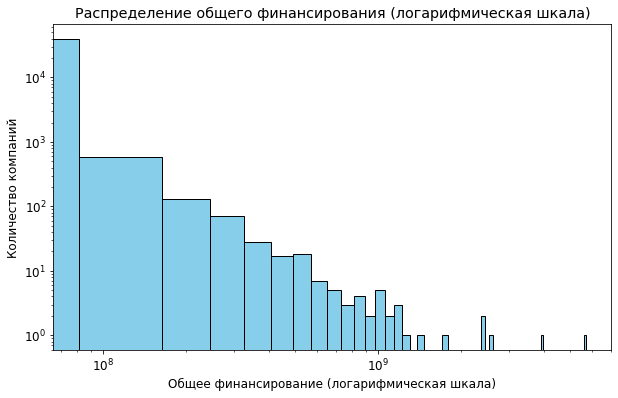

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df_40000['funding_total'], bins=70, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()


### 3.3. Куплены забесплатно?

- Рассморим компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и определим, каким процентилям границы соответствуют.

In [71]:
# Проверяем уникальные значения статуса компании
display(df_40000['status'].unique())

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [72]:
# Рассмотрим краткое статистическое описание данных столбца 'price_amount'
acquisition_df['price_amount'].describe().apply(lambda x: '{:.0f}'.format(x))

count             9407
mean         393296496
std        26821978227
min                  0
25%                  0
50%                  0
75%              23432
max      2600000000000
Name: price_amount, dtype: object

In [73]:
# Соединяем датафреймы df_40000 и acquisition по столбцам с разными названиями

# Присоединение делаем левое, т.к. нам нужна информация о продажах всех компаниях 
df_40000_price = df_40000.merge(acquisition_df, left_on='company_id_company', right_on='acquired_company_id', how = 'left')
# Удаляем столбец id из присоединяемой таблицы
acquisition_df = df_40000_price.drop(columns='id', errors='ignore')

# Удаляем явные дубликаты
acquisition_df = acquisition_df.drop_duplicates()

# Подсчитываем количество вхождений company_id_company
duplicates_count = acquisition_df.groupby('company_id_company').size().reset_index(name='Количество повторений')
duplicates_count = duplicates_count[duplicates_count['Количество повторений'] > 1]

print("Количество повторений company_id_company")
display(duplicates_count.sort_values(by='Количество повторений', ascending=False))
        
# Фильтруем только компании с дубликатами
companies_with_duplicates = duplicates_count['company_id_company']

# Выводим все записи для компаний с дубликатами
duplicates_full = df_40000_price[df_40000_price['company_id_company'].isin(companies_with_duplicates)] #Результатом isin() является булевый массив (True/False) той же длины, что и исходный столбец

if not duplicates_full.empty:
    print(f"Обнаружено {len(duplicates_full)} записей с дубликатами из-за неоднократной продажи компании:")
    display(duplicates_full[['company_id_company', 'acquiring_company_id', 'acquired_at']])
else:
    print("Дубликаты company_id не обнаружены")

Количество повторений company_id_company


,company_id_company,Количество повторений
7930,26851.0,5
442,596.0,5
19806,66494.0,3
21622,76479.0,3
13682,44881.0,3
...,...,...
2733,7299.0,2
2703,7168.0,2
2613,6796.0,2
2322,5638.0,2


Обнаружено 248 записей с дубликатами из-за неоднократной продажи компании:


,company_id_company,acquiring_company_id,acquired_at
717,11716.0,1735.0,2010-02-03
718,11716.0,29.0,2002-01-11
818,11943.0,20.0,2005-06-30
819,11943.0,204845.0,2005-01-01
912,1216.0,185.0,2001-03-09
...,...,...,...
40352,867.0,1622.0,2011-07-19
40574,9250.0,22878.0,2008-06-01
40575,9250.0,565.0,2010-12-30
40853,997.0,29.0,2007-09-01


In [74]:
# Фильтрация по статусу "acquired"
df_40000_acquired = acquisition_df[acquisition_df['status'] == 'acquired']

# Фильтрация по ненулевому финансированию
df_40000_acquired_nonzero = df_40000_acquired[df_40000_acquired['funding_total'] > 0]

# Фильтрация по символической цене покупки
df_40000_acquired_nonzero_symbolic_sold = df_40000_acquired_nonzero[df_40000_acquired_nonzero['price_amount'] <= 1]

# Результат
display(f"Найдено {len(df_40000_acquired_nonzero_symbolic_sold)} компаний, проданных за символическую сумму")
display(df_40000_acquired_nonzero_symbolic_sold[['name', 'category_code', 'funding_total', 'status']])

'Найдено 1618 компаний, проданных за символическую сумму'

,name,category_code,funding_total,status
25,Jumptap,mobile,121500000.0,acquired
63,SideTour,web,4000000.0,acquired
66,ChoicePass,enterprise,250000.0,acquired
67,Producteev,software,1310000.0,acquired
68,TradeCard,enterprise,44925000.0,acquired
...,...,...,...,...
40834,Amie Street,web,3900000.0,acquired
40836,UBmatrix,software,5172350.0,acquired
40840,wunderloop,advertising,10000000.0,acquired
40854,Zimbra,enterprise,14500000.0,acquired


In [75]:
# Вычисляем квартили
Q1 = df_40000['funding_total'].quantile(0.25)
Q3 = df_40000['funding_total'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Вычисляем границы
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

display(f"Нижняя граница выбросов: {lower_fence}, верхняя: {upper_fence}")


'Нижняя граница выбросов: -8475975.0, верхняя: 14126625.0'

In [76]:
# Рассмотрим краткое статистическое описание данных столбца 'funding_total'
df_40000['funding_total'].describe().apply(lambda x: '{:.0f}'.format(x))

count         40747
mean       10135610
std        56464360
min               0
25%               0
50%          600000
75%         5650650
max      5700000000
Name: funding_total, dtype: object

**Промежуточный вывод**:  

В процессе объединения двух датафреймов выявлен факт неоднократной покупки/продажи компаний (от 2 до 5 раз).  
Причиной возникновения повторов послужил тот факт, что один и тот же стратап покупался несколько раз за разную стоимость и через некоторый интервал времени. Удалению данные строки не подлежат, т.к. являются равнозначными участниками анализа фактически проведенных покупок.  Найдено 1618 компаний, проданных за символическую сумму (0..1$).

Нижняя граница (-8 475 975), полученная расчетным путем, не имеет смысла, т.к. финансирование не может быть отрицательным. Значит основная масса данных находится между 0 и 5 650 650.  
Любое значение выше 14 126 550 можно считать выбросом.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

In [77]:
# Рассмотрим краткое статистическое описание данных столбца 'funding_total'
df_40000_price['price_amount'].describe().apply(lambda x: '{:.0f}'.format(x))

count             9390
mean         393988145
std        26846244614
min                  0
25%                  0
50%                  0
75%              23626
max      2600000000000
Name: price_amount, dtype: object

In [78]:
# Для анализа типичных цен оставляем в сводном df только строки с адексатной ценой больше 1 $
df_40000_price_deviations = df_40000_price[df_40000_price['price_amount'] > 1]

# Группируем по категориям, сортируем по убыванию типичной цены
category_analysis = (df_40000_price_deviations.groupby('category_code')['price_amount']
    .agg(['median', 'std', 'count'])
    .query("count>=5")
    .sort_values(by='median', ascending = False))

# Форматируем столбец std
category_analysis['std'] = category_analysis['std'].apply(lambda x: '{:.0f}'.format(x))

display("ТОП-5 категорий с типично высокими ценами:")
display(category_analysis.head(5))

'ТОП-5 категорий с типично высокими ценами:'

,median,std,count
category_code,,,
real_estate,400000000.0,2676302206,6
manufacturing,351000000.0,1060434506,21
biotech,200000000.0,1968195264,263
cleantech,185000000.0,874419628,39
finance,171500000.0,1052920129,20


In [79]:
# Для анализа разброса цен оставляем в df только строки с адекватной ценой больше 1 $
df_40000_price_deviations = df_40000_price[df_40000_price['price_amount'] > 1]

# Группируем по категориям
category_analysis = (df_40000_price_deviations.groupby('category_code')
    .agg({'price_amount':['max', 'min', 'std', 'count']}))

# Переименовываем столбцы для удобства и форматирования
category_analysis.columns = ['_'.join(col) for col in category_analysis.columns]

# Считаем разброс
category_analysis['price_spread'] = category_analysis['price_amount_max'] - category_analysis['price_amount_min']

# Фильтруем категории с наибольшим разбросом
high_spread_categories = category_analysis[category_analysis['price_spread'] > category_analysis['price_spread'].median()]

# Форматируем нужные столбцы
cols_to_format = ['price_amount_max', 'price_amount_std', 'price_spread']
high_spread_categories[cols_to_format] = high_spread_categories[cols_to_format].apply(lambda x: x.apply(lambda y: '{:,.0f}'.format(y)))

# Выводим результат
print("ТОП-5 категорий с наибольшим разбросом цен:")
display(high_spread_categories.sort_values(by='price_spread', ascending=False).head(5))

ТОП-5 категорий с наибольшим разбросом цен:


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price_amount_max,price_amount_min,price_amount_std,price_amount_count,price_spread
category_code,,,,,
games_video,"10,000,000,000",60.0,"1,463,477,654",88,"9,999,999,940"
security,"7,680,000,000",1850000.0,"1,378,442,023",36,"7,678,150,000"
real_estate,"6,850,000,000",3000000.0,"2,676,302,206",6,"6,847,000,000"
semiconductor,"6,500,000,000",1500000.0,"1,122,024,808",71,"6,498,500,000"
web,"6,400,000,000",5000.0,"695,440,501",260,"6,399,995,000"


**Промежуточный вывод**:  

- ТОП-5 категорий с типично высокими ценами сформирован на основании сводного датафрейма и данных, отфильтрованных в нем по признаку "Сумма сделки > 1 доллара". Типичная цена рассчитана как медиана значений, а группы сформированы из категорий, где было не менее 5 сделок. К таким категориям относятся недвижимость, производство, биотехнологии, чистые технологии и финансы .
    
    | Категория | Median | Std | Кол-во сделок |
|-----------|:------:|:--------:|---------------|
| real_estate | 400,000,000 | 2,676,302,206 | 6 |
| manufacturing | 351,000,000 | 1,060,434,506 | 21 |
| biotech | 200,000,000 | 1,968,195,264 | 263 |
| cleantech | 185,000,000 | 874,419,628 | 39 |
| finance | 171,500,000 | 1,052,920,129 | 20 |
 
- ТОП-5 категорий с наибольшим разбросом цен сформирован на основании сводного датафрейма и данных, отфильтрованных в нем по признаку "Сумма сделки > 1 доллара". Типичная цена рассчитана как медиана значений, а топ-5 выбраны из набора данных, где отклонение выше типичного. Максимальный разброс цен наблюдается у категорий игры&видео, безопасность, недвижимость, полупроводники и сетевые разработки.

| Категория | Максимум | Минимум | Стандартное отклонение | Количество | Разброс |
|-----------|:--------:|:-------:|:---------------------:|:----------:|:-------:|
| games_video | 10,000,000,000 | 60 | 1,463,477,654 | 88 | 9,999,999,940 |
| security | 7,680,000,000 | 1,850,000 | 1,378,442,023 | 36 | 7,678,150,000 |
| real_estate | 6,850,000,000 | 3,000,000 | 2,676,302,206 | 6 | 6,847,000,000 |
| semiconductor | 6,500,000,000 | 1,500,000 | 1,122,024,808 | 71 | 6,498,500,000 |
| web | 6,400,000,000 | 5,000 | 695,440,501 | 260 | 6,399,995,000 |



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [80]:
# Предварительный анализ количества раундов финансирования
df_40000['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [81]:
# Для анализа количества раундов финансирования оставляем в df только строки, 
#  где число руанов указано и финансирование было больше 0
df_40000_notnull = df_40000[(df_40000['funding_rounds'] > 0)|(df_40000['funding_total'] > 0)]

# Анализ группировки по статусам
typical_rounds = (df_40000_notnull.groupby('status')['funding_rounds'].count().sort_values(ascending=False))
display(typical_rounds)

status
operating    26535
acquired      2593
closed        2089
ipo            490
Name: funding_rounds, dtype: int64

In [82]:
# Для анализа количества раундов финансирования оставляем в df только строки, 
#  где число руанов указано и финансирование было больше 0
df_40000_notnull = df_40000[(df_40000['funding_rounds'] > 0)|(df_40000['funding_total'] > 0)]

# Группируем по категориям
typical_rounds = (df_40000_notnull.groupby('status')['funding_rounds']
                  .mean()
                  .sort_values(ascending=False)
                  .reset_index()
                 )
                  
# Переименовываем столбцы для удобства
typical_rounds.columns = ['Статус', 'Среднее количество раундов']

typical_rounds.reset_index()

,index,Статус,Среднее количество раундов
0,0,ipo,2.526531
1,1,acquired,1.896645
2,2,operating,1.642359
3,3,closed,1.383437


In [83]:
# Предварительный анализ количества раундов финансирования
df_40000_notnull['funding_rounds'].describe()

count    31707.000000
mean         1.659760
std          1.201666
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

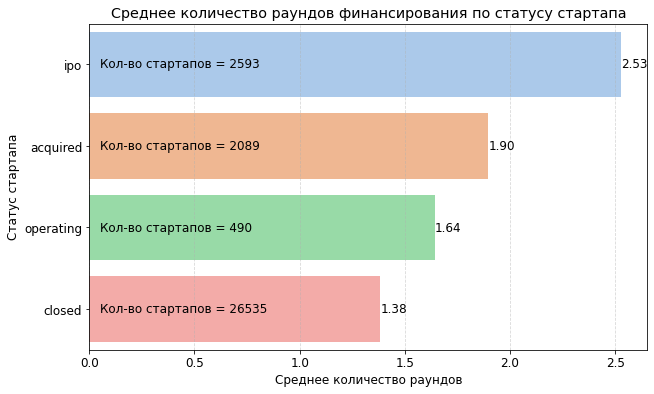

In [84]:
# Создаем график
plt.figure(figsize=(10, 6))

# Используем seaborn для создания барплота
sns.barplot(x='Среднее количество раундов', y='Статус', 
            data=typical_rounds, 
            #ci=None,  # Отключаем доверительные интервалы
            palette='pastel')

# Добавляем значения среднего количества раундов
for index, row in typical_rounds.iterrows():
    plt.text(row['Среднее количество раундов'], index, 
             f'{row["Среднее количество раундов"]:.2f}', 
             va='center', ha='left', 
             fontsize=12)

# Добавляем количество стартапов
total_counts = df_40000_notnull['status'].value_counts().sort_index()
for i, count in enumerate(total_counts):
    plt.text(0.05, i, f'Кол-во стартапов = {count}', va='center', ha='left', fontsize=12)

# Настройка оформления
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Среднее количество раундов')
plt.ylabel('Статус стартапа')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

**Промежуточный вывод**:    

Типичное значение количества раундов для каждого статуса стартапа варьируется в диапазоне от 1,38 до 2,53. Для анализа отобраны данные, где число раундов и финансирование больше 0.  

| Статус | Среднее количество раундов |
|--------|----------------------------|
| ipo | 2.53 |
| acquired | 1.90 |
| operating | 1.64 |
| closed | 1.38 |  

Из диаграммы видно, что максимальное кол-во стартапов (26 535 шт.) находится в статусе closet с наименьшим средним количеством раундов (1,38).  
Стартапы, получившие финансирование в среднем более 2,5 раз, показывают свою успешность, предлагая свои акции инвесторам для покупки (в статусе IPO - 2593 шт.), и готовы к перспективам роста.


## Шаг 4. Итоговый вывод и рекомендации

**Реализация проекта:**  

В процессе работы над поставленной задачей была проведена **предобработка данных**. Были рассмотрены предоставленные датасеты, выявлены критичные и не критичные пропуски данных, преобразованы на оптимальные типы данных в столбцах `acquisition_df, comp_and_round_df, education_df, fund_df`, заменены названия столбцов под общепринятый стиль snake_case.  
Наличие высокого процента пропусков в `company_and_rounds.csv` подтвердило гипотезу заказчика о том, что данные по компаниям из этой таблицы раньше хранились иначе. Было проведено разделение данных с указанием связующего идентификатора `id_company`. Столбец `network_username`, который встречается в нескольких датасетах, НЕ подходит для объединения данных, т.к. несет в себе разную информацию. При этом общих значений во всех трех датасетах только 8   

**Анализ динамики финансирования** показал, что
- Наблюдается спад объемов финансирования с 2005 по 2012 год;
- 2013 год показывает рост (+200 тыс $);
- Количество раундов растет при относительно стабильном финансировании.

**Структура компаний и образование сотрудников** выявили, что большинство компаний имеют небольшой штат (до 10 человек):
- 18 117 компаний имеют 1 сотрудника;
- 2 709 компаний имеют 2 сотрудника;
- 1 976 компаний имеют до 10 сотрудников.

В целом по всем группам 46-49 % сотрудников не имеют отметки о наличии образования.  
Компании с 6-10 сотрудниками имеют максимальный процент кадров без образования (53,2%).  
Компании с 26+ сотрудниками имеют только 26,5 % сотрудников без образования, т.е. в данной группе самый высокий процент наличия высококвалифицированных кадров.  

**Сумма общего финансирования**, указанная в столбце `funding_total` имеет значительную асимметрию данных и без доп. обработки непригодна к типичному анализу: 
- среднее (10.1 млн) меньше медианы (600 000);
- 25% данных имеют нулевое финансирование;
- Максимальное значение: 5.7 млрд $;
- наличие выбросов: значения выше 14 126 550.  

Ключевыми категориями, где зафиксированы **высокие цены сделки** по покупке стартапа, являются:
1. Недвижимость
2. Производство
3. Биотехнологии
4. Чистые технологии
5. Финансы  

Максимальный **разброс цен** зафиксирован в категориях:
1. Игры & видео
2. Безопасность
3. Недвижимость
4. Полупроводники
5. Сетевые разработки

В процессе анализа стоимости стартапа выявлен факт **неоднократной покупки/продажи компаний (от 2 до 5 раз)**.  
Причиной возникновения повторов послужило, что один и тот же стратап покупался несколько раз разными компаниями за разную стоимость и через некоторый интервал времени. Удалению данные строки не подлежат, т.к. являются равнозначными участниками анализа фактически проведенных покупок.  Найдено 1618 компаний, проданных за символическую сумму (0..1$).

Типичное значение **количества раундов** для каждого статуса стартапа варьируется в диапазоне от 1,38 до 2,53. Для анализа отобраны данные, где число раундов и финансирование больше 0. Максимальное кол-во стартапов (26 535 шт.) находится в статусе closet с наименьшим средним количеством раундов (1,38). Стартапы, получившие финансирование в среднем более 2,5 раз, показывают свою успешность в статусе IPO (2593 шт.) и готовы к перспективам роста.


**Рекомендации:**  

С целью повышения вероятности заключения успешной сделки по покупке компании рекомендую сфокусироваться на перспективных направлениях:
1. Востребованные категории с высокими ценами;
2. Стартапы в статусе IPO с дальнейшим исследованием факторов их успеха;
3. Компании с оптимальным штатом высококвалифицированных сотрудников(26+ человек).  

При этом стоит обратить внимание и, возможно, провести дополнительные изучения причин возникновения асимметрии финансирования стартапов и анализ эффективности раундов финансирования.